In [297]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv


In [298]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model

train_data_source = '/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv'
test_data_source = '/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv'
validation_data_source='/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv'



In [299]:
train_df = pd.read_csv(train_data_source, header=None)
test_df = pd.read_csv(test_data_source, header=None)
valid_df=pd.read_csv(validation_data_source,header=None)
train_df=train_df.iloc[1:, :]
test_df=test_df.iloc[1:,:]
valid_df=valid_df.iloc[1:,:]



train_df

,0,1
1,I grew up (b. 1965) watching and loving the Th...,0
2,"When I put this movie in my DVD player, and sa...",0
3,Why do people who do not know what a particula...,0
4,Even though I have great interest in Biblical ...,0
5,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39996,"""Western Union"" is something of a forgotten cl...",1
39997,This movie is an incredible piece of work. It ...,1
39998,My wife and I watched this movie because we pl...,0
39999,"When I first watched Flatliners, I was amazed....",1


In [300]:
train_texts = train_df[0].values
train_texts = [s.lower() for s in train_texts]

In [301]:
test_texts = test_df[0].values
test_texts = [s.lower() for s in test_texts]

valid_texts=valid_df[0].values
valid_texts = [s.lower() for s in valid_texts]

In [302]:
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tk.fit_on_texts(train_texts)

In [303]:
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789 ,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

In [304]:
# char_dict[' '] = 37
# print(max(char_dict.values()))

In [305]:
tk.word_index = char_dict.copy()
# Add 'UNK' to the vocabulary
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1
len(tk.word_index)

70

In [306]:
train_sequences = tk.texts_to_sequences(train_texts)
test_texts = tk.texts_to_sequences(test_texts)
valid_texts=tk.texts_to_sequences(valid_texts)

In [307]:
print(train_texts[0])
print(train_sequences[0])

i grew up (b. 1965) watching and loving the thunderbirds. all my mates at school watched. we played "thunderbirds" before school, during lunch and after school. we all wanted to be virgil or scott. no one wanted to be alan. counting down from 5 became an art form. i took my children to see the movie hoping they would get a glimpse of what i loved as a child. how bitterly disappointing. the only high point was the snappy theme tune. not that it could compare with the original score of the thunderbirds. thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created. jonatha frakes should hand in his directors chair, his version was completely hopeless. a waste of film. utter rubbish. a cgi remake may be acceptable but replacing marionettes with homo sapiens subsp. sapiens was a huge error of judgment.
[9, 37, 7, 18, 5, 23, 37, 21, 16, 37, 64, 2, 40, 37, 28, 36, 33, 32, 65, 37, 23, 1, 20, 3, 8, 9, 14, 7, 37, 1, 14, 4, 37, 12,

In [309]:
# Padding
train_data = pad_sequences(train_sequences, maxlen=1014, padding='post')
test_data = pad_sequences(test_texts, maxlen=1014, padding='post')
valid_data=pad_sequences(valid_texts, maxlen=1014, padding='post')

In [310]:
# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
test_data = np.array(test_data, dtype='float32')
valid_data=np.array(valid_data, dtype='float32')


train_class_list=train_df[1].values
test_class_list=test_df[1].values
valid_class_list=valid_df[1].values

from tensorflow.keras.utils import to_categorical
train_classes = to_categorical(train_class_list)
test_classes = to_categorical(test_class_list)
valid_classes = to_categorical(valid_class_list)


In [311]:
train_df

,0,1
1,I grew up (b. 1965) watching and loving the Th...,0
2,"When I put this movie in my DVD player, and sa...",0
3,Why do people who do not know what a particula...,0
4,Even though I have great interest in Biblical ...,0
5,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39996,"""Western Union"" is something of a forgotten cl...",1
39997,This movie is an incredible piece of work. It ...,1
39998,My wife and I watched this movie because we pl...,0
39999,"When I first watched Flatliners, I was amazed....",1


In [312]:
print(tk.word_index)
len(tk.word_index)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '0': 27, '1': 28, '2': 29, '3': 30, '4': 31, '5': 32, '6': 33, '7': 34, '8': 35, '9': 36, ' ': 37, ',': 38, ';': 39, '.': 40, '!': 41, '?': 42, ':': 43, "'": 44, '"': 45, '/': 46, '\\': 47, '|': 48, '_': 49, '@': 50, '#': 51, '$': 52, '%': 53, '^': 54, '&': 55, '*': 56, '~': 57, '`': 58, '+': 59, '-': 60, '=': 61, '<': 62, '>': 63, '(': 64, ')': 65, '[': 66, ']': 67, '{': 68, '}': 69, 'UNK': 70}


70

In [313]:
# parameter
input_size = 1014
vocab_size = len(tk.word_index)
print(vocab_size)
embedding_size = 70
conv_layers = [[256, 7, 3],
               [256, 7, 3],
               [256, 3, -1],
               [256, 3, -1],
               [256, 3, -1],
               [256, 3, 3]]

fully_connected_layers = [1024, 1024]
num_of_classes = 2
dropout_p = 0.5
loss = 'categorical_crossentropy'

70


In [314]:
# Embedding weights
embedding_weights = [] 
embedding_weights.append(np.zeros(vocab_size))  # (0, 70)

for char, i in tk.word_index.items():  # from index 1 to 70
    onehot = np.zeros(vocab_size)
    onehot[i - 1] = 1
    embedding_weights.append(np.random.randn(vocab_size))

embedding_weights = np.array(embedding_weights)
embedding_weights


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.95423986, -1.45925247, -0.7610885 , ..., -0.3061221 ,
         0.25049693,  1.01942245],
       [ 1.12193197, -1.36327884,  1.31490921, ..., -0.68694771,
        -0.33252848, -0.06412613],
       ...,
       [-0.48957444,  0.12934418, -0.0920936 , ..., -0.06823832,
         1.24942696, -0.45782717],
       [-1.02607738,  0.61407619,  0.0899774 , ...,  2.0745723 ,
        -2.01041275,  1.81603124],
       [-1.23278432,  0.17915052,  0.67925365, ..., -0.11665343,
        -0.83874459,  0.37482965]])

In [315]:
# Embedding layer Initialization
embedding_layer = Embedding(vocab_size + 1,
                            embedding_size,
                            input_length=input_size,
                            weights=[embedding_weights])

In [316]:
print(embedding_weights.shape) # first row all 0 for PAD, 69 char, last row for UNK
embedding_weights

(71, 70)


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.95423986, -1.45925247, -0.7610885 , ..., -0.3061221 ,
         0.25049693,  1.01942245],
       [ 1.12193197, -1.36327884,  1.31490921, ..., -0.68694771,
        -0.33252848, -0.06412613],
       ...,
       [-0.48957444,  0.12934418, -0.0920936 , ..., -0.06823832,
         1.24942696, -0.45782717],
       [-1.02607738,  0.61407619,  0.0899774 , ...,  2.0745723 ,
        -2.01041275,  1.81603124],
       [-1.23278432,  0.17915052,  0.67925365, ..., -0.11665343,
        -0.83874459,  0.37482965]])

In [317]:
# Input
inputs = Input(shape=(input_size,), name='input', dtype='int64')  # shape=(?, 1014)
# Embedding
x = embedding_layer(inputs)
# Conv
for filter_num, filter_size, pooling_size in conv_layers:
    x = Conv1D(filter_num, filter_size)(x)
    x = Activation('relu')(x)
    if pooling_size != -1:
        x = MaxPooling1D(pool_size=pooling_size)(x)  # Final shape=(None, 34, 256)
x = Flatten()(x)  # (None, 8704)
# Fully connected layers
for dense_size in fully_connected_layers:
    x = Dense(dense_size, activation='relu')(x)  # dense_size == 1024
    x = Dropout(dropout_p)(x)
# Output Layer
predictions = Dense(num_of_classes, activation='sigmoid')(x)
# Build model
model = Model(inputs=inputs, outputs=predictions)
from tensorflow.keras.optimizers import SGD, Adam
opt = Adam(learning_rate=0.0001)
model.compile(loss = "binary_crossentropy", optimizer = opt,metrics=['accuracy'])
# Adam, binary_crossentropy
model.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1014)]            0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 1014, 70)          4970      
_________________________________________________________________
conv1d_126 (Conv1D)          (None, 1008, 256)         125696    
_________________________________________________________________
activation_126 (Activation)  (None, 1008, 256)         0         
_________________________________________________________________
max_pooling1d_63 (MaxPooling (None, 336, 256)          0         
_________________________________________________________________
conv1d_127 (Conv1D)          (None, 330, 256)          459008    
_________________________________________________________________
activation_127 (Activation)  (None, 330, 256)          0  

In [318]:
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)

x_train = train_data[indices]
y_train = train_classes[indices]

x_test = test_data
y_test = test_classes


history=model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=128,
          epochs=20,
          verbose=2,
         )


Epoch 1/20
313/313 - 31s - loss: 0.6946 - accuracy: 0.5042 - val_loss: 0.6928 - val_accuracy: 0.4986
Epoch 2/20
313/313 - 30s - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6926 - val_accuracy: 0.5096
Epoch 3/20
313/313 - 29s - loss: 0.6930 - accuracy: 0.5077 - val_loss: 0.6924 - val_accuracy: 0.5198
Epoch 4/20
313/313 - 29s - loss: 0.6925 - accuracy: 0.5098 - val_loss: 0.6913 - val_accuracy: 0.5742
Epoch 5/20
313/313 - 29s - loss: 0.6835 - accuracy: 0.5520 - val_loss: 0.6221 - val_accuracy: 0.6664
Epoch 6/20
313/313 - 29s - loss: 0.5846 - accuracy: 0.6891 - val_loss: 0.4867 - val_accuracy: 0.7664
Epoch 7/20
313/313 - 29s - loss: 0.4592 - accuracy: 0.7823 - val_loss: 0.4131 - val_accuracy: 0.8044
Epoch 8/20
313/313 - 29s - loss: 0.3808 - accuracy: 0.8286 - val_loss: 0.3908 - val_accuracy: 0.8202
Epoch 9/20
313/313 - 29s - loss: 0.3353 - accuracy: 0.8537 - val_loss: 0.3666 - val_accuracy: 0.8320
Epoch 10/20
313/313 - 29s - loss: 0.2925 - accuracy: 0.8758 - val_loss: 0.3776 - val_accura

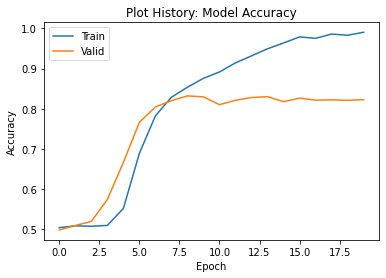

In [319]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.title('Plot History: Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

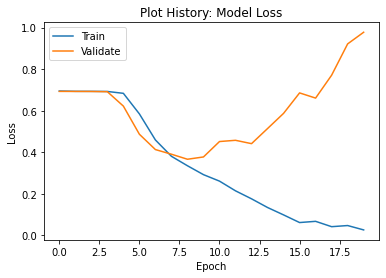

In [320]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Plot History: Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [321]:
x_test1=valid_data
y_test1=valid_classes
score = model.evaluate(x_test1, y_test1)
print("Test loss: {:.3f}".format(score[0]))
print("Test accuracy: {:.3f}".format(score[1]))

157/157 [==============================] - 2s 10ms/step - loss: 0.9844 - accuracy: 0.8292
Test loss: 0.984
Test accuracy: 0.829
